# Explore here

In [4]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#empezare a analizar las variables categoricas

import matplotlib.pyplot as plt
import seaborn as sns

se=df.groupby('sex').size().reset_index()
sm=df.groupby('smoker').size().reset_index()
re=df.groupby('region').size().reset_index()
print('se','sm','re')

se sm re


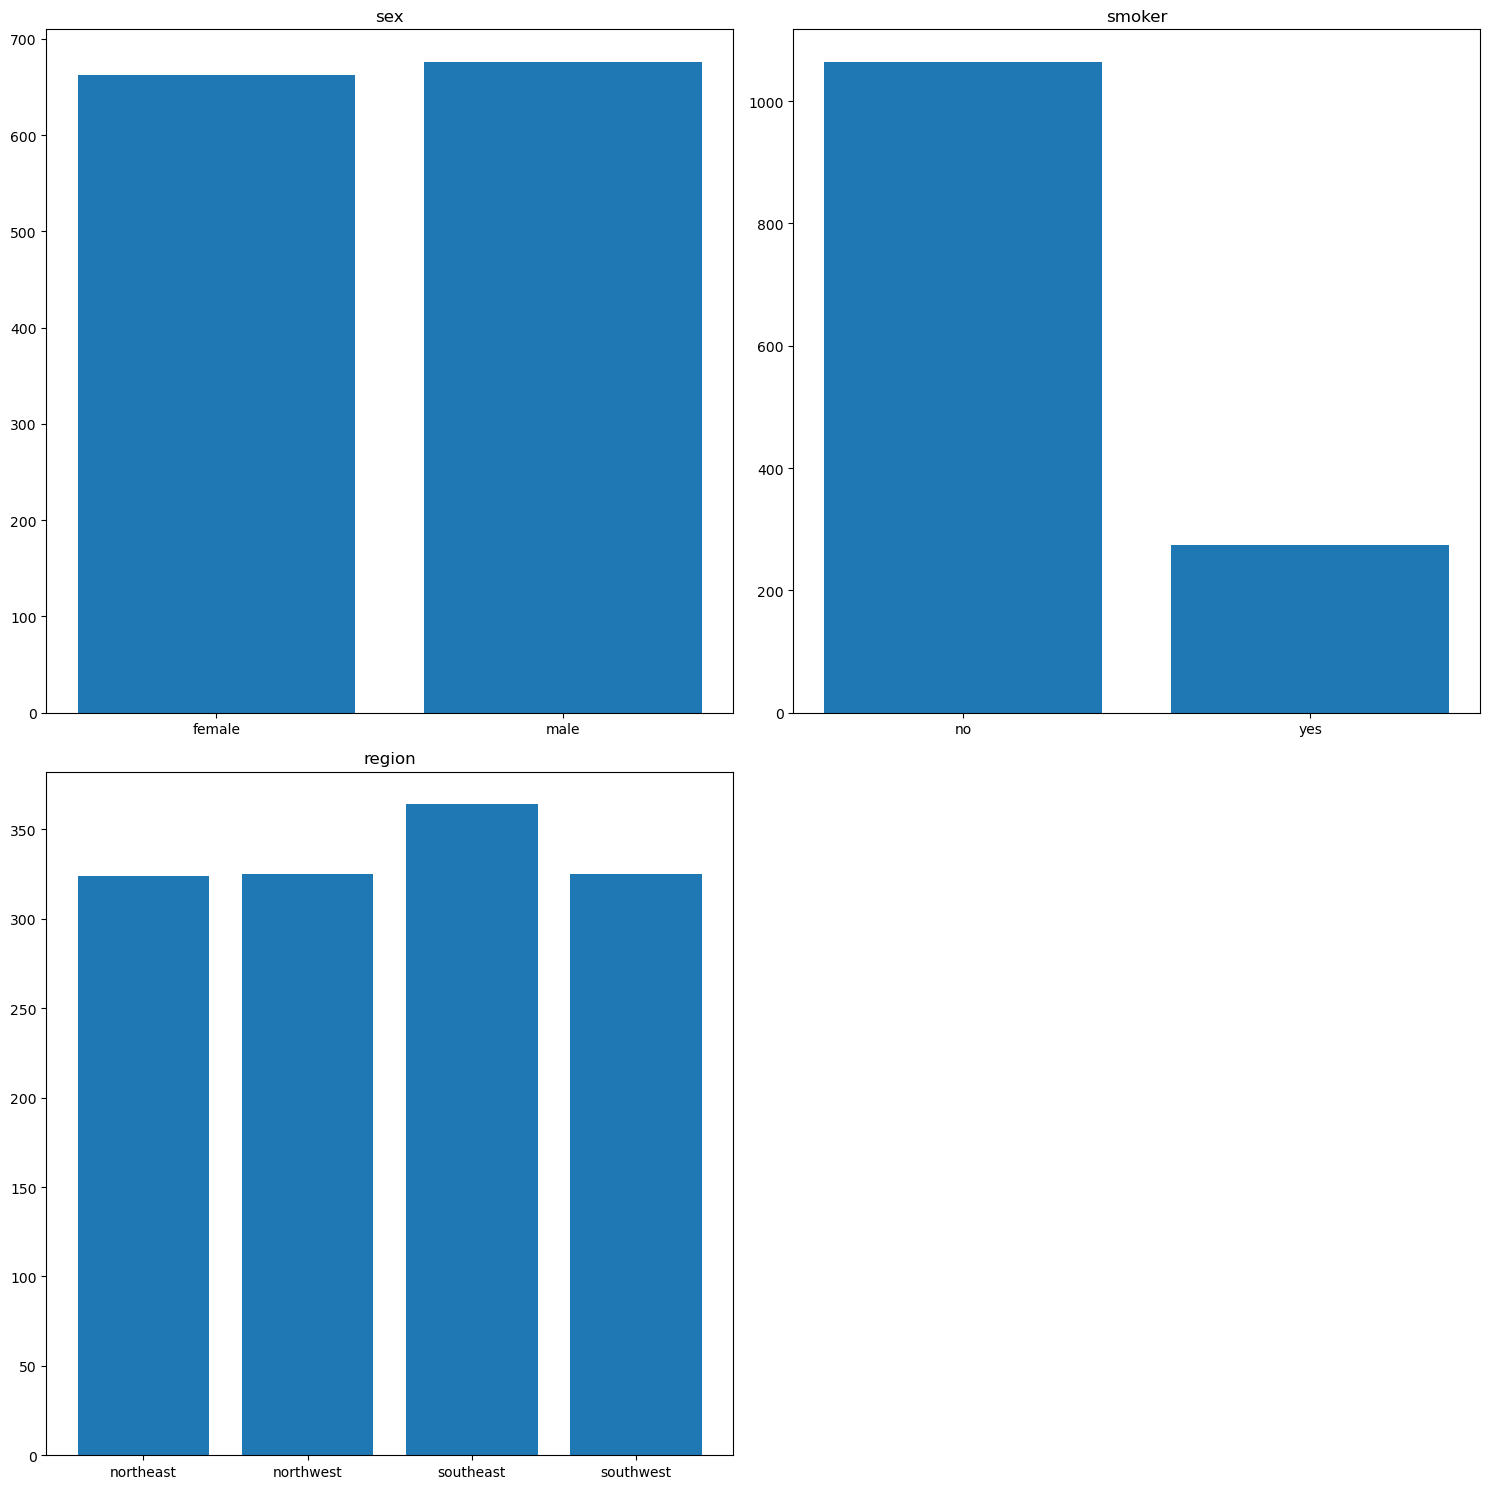

In [ ]:
import matplotlib.pyplot as plt



fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axes[0, 0].bar(se.sex, se[0])
axes[0, 0].set_title("sex")

axes[0, 1].bar(sm.smoker, sm[0])
axes[0, 1].set_title("smoker")


axes[1, 0].bar(re.region, re[0])
axes[1, 0].set_title("region")

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

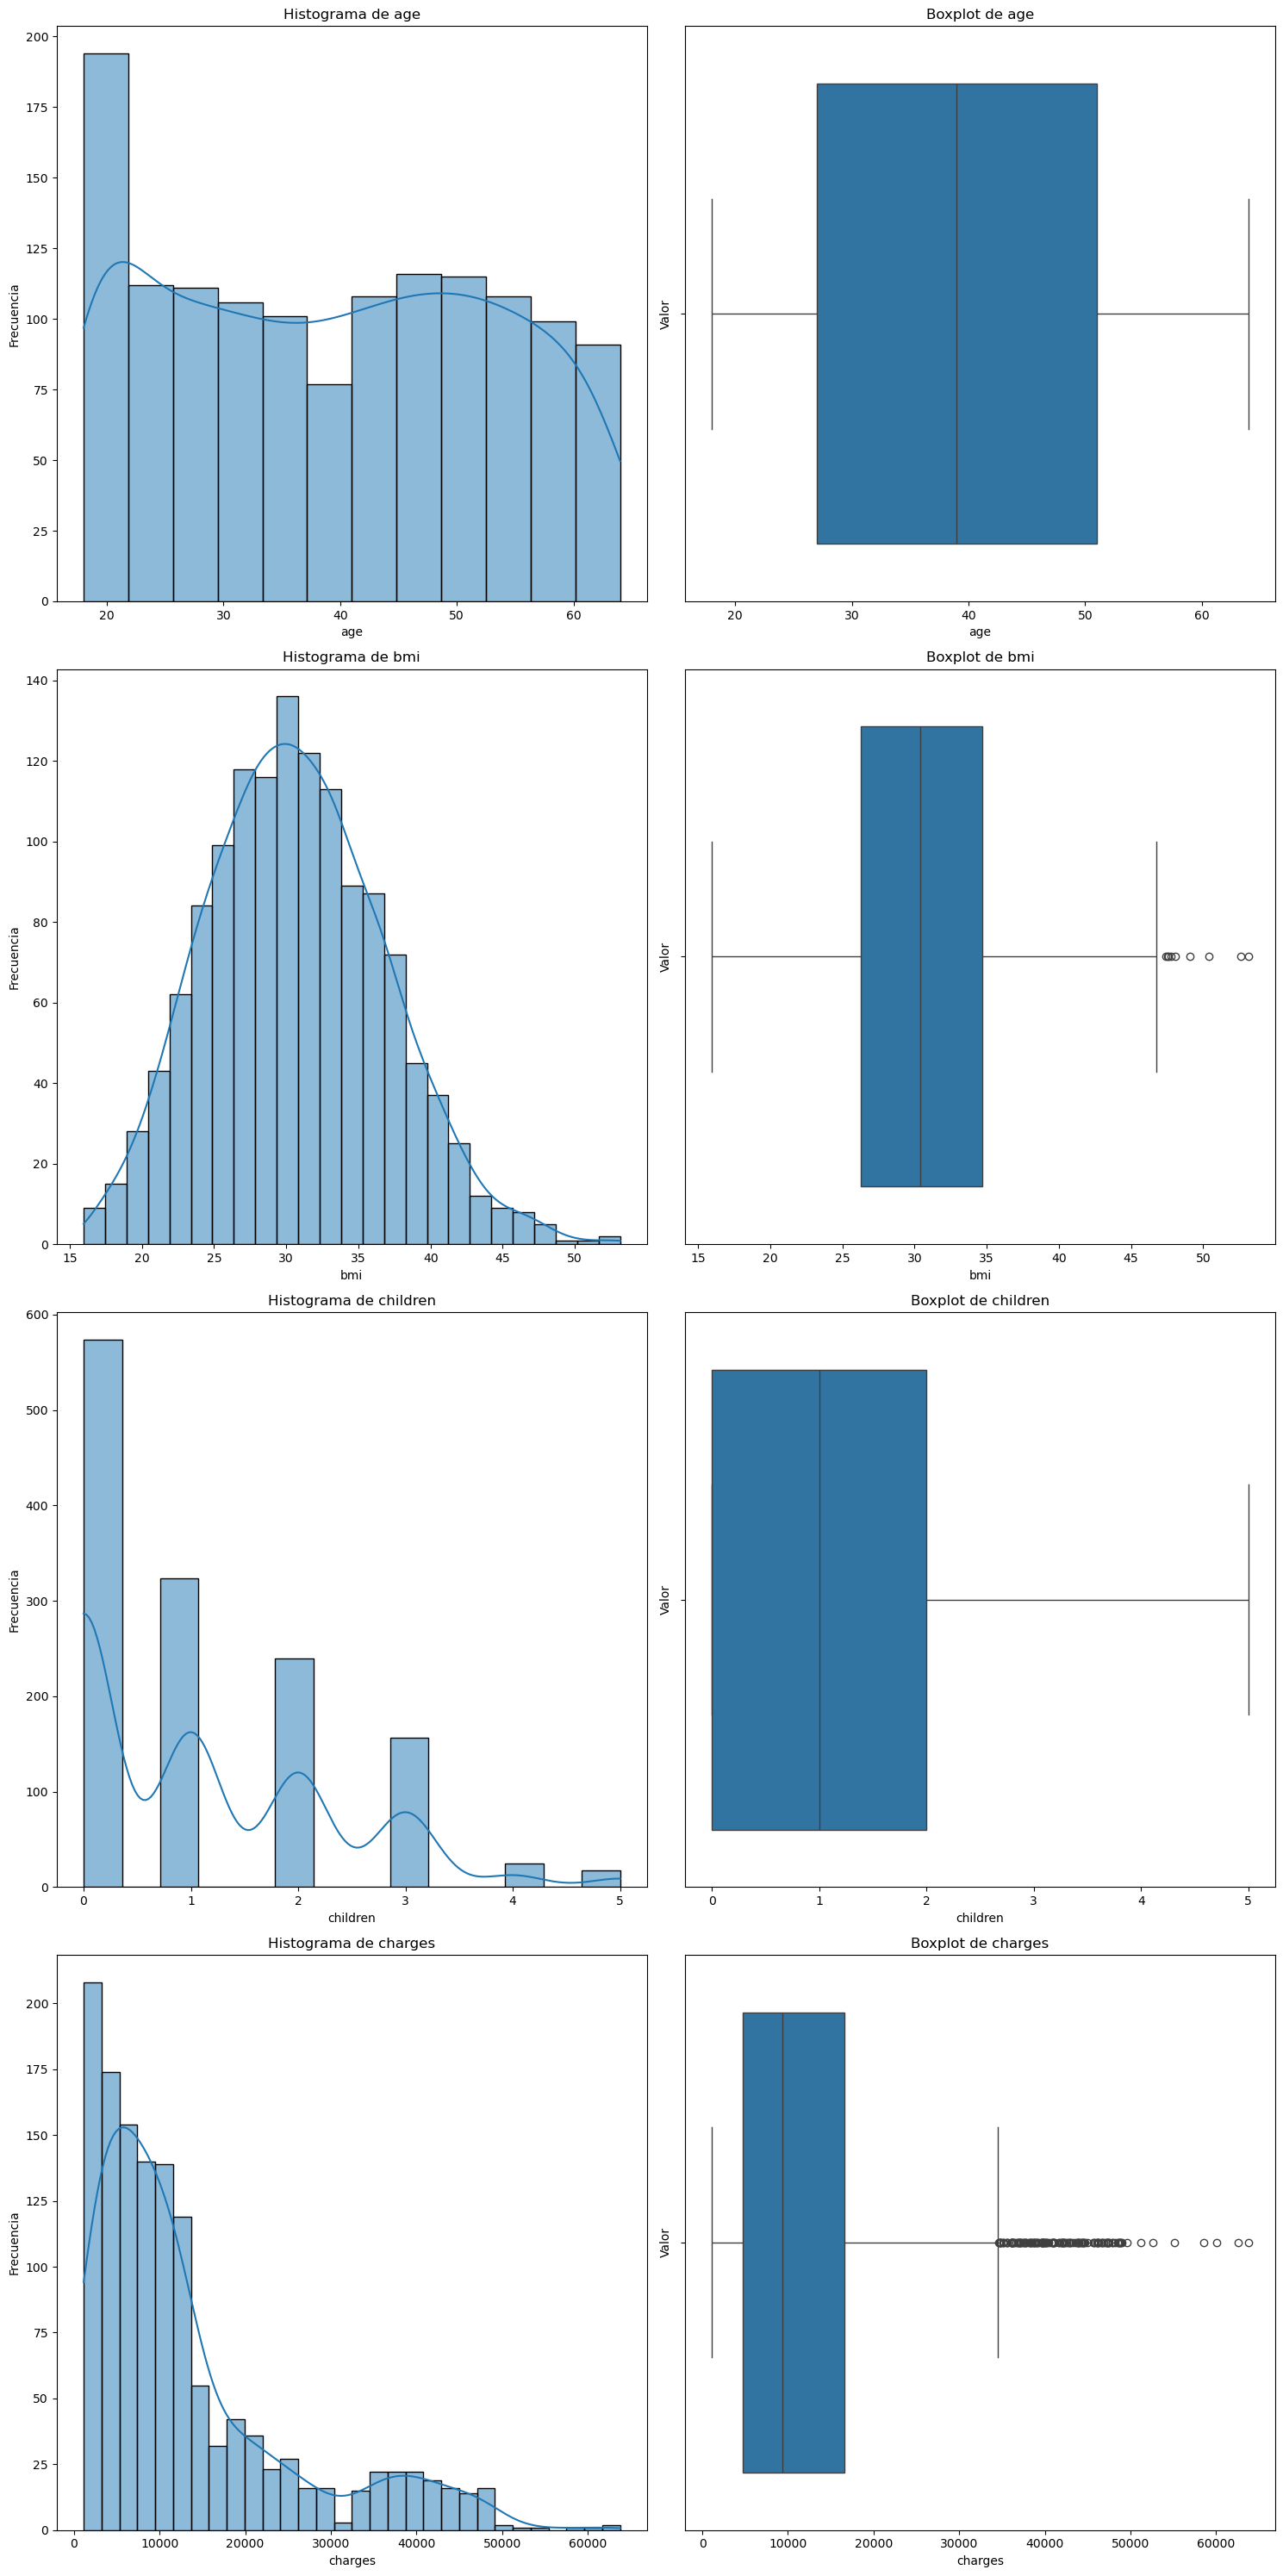

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Ahora analizaremos las variables numericas

fig, axes = plt.subplots(4, 2, figsize=(15, 30))  

variables_numericas = ["age", "bmi", "children", "charges"]

for i, variable in enumerate(variables_numericas):
    # Histograma
    sns.histplot(ax=axes[i, 0], data=df, x=variable, kde=True)
    axes[i, 0].set_title(f"Histograma de {variable}")
    axes[i, 0].set_xlabel(variable)
    axes[i, 0].set_ylabel("Frecuencia")

    # Boxplot
    sns.boxplot(ax=axes[i, 1], data=df, x=variable)
    axes[i, 1].set_title(f"Boxplot de {variable}")
    axes[i, 1].set_xlabel(variable)
    axes[i, 1].set_ylabel("Valor")

plt.tight_layout()
plt.show()


#el histplot lo estoy usando para enterarme de los datos recurrentes
#el boxplot lo estoy utilizando para los valores atipicos


<function matplotlib.pyplot.show(close=None, block=None)>

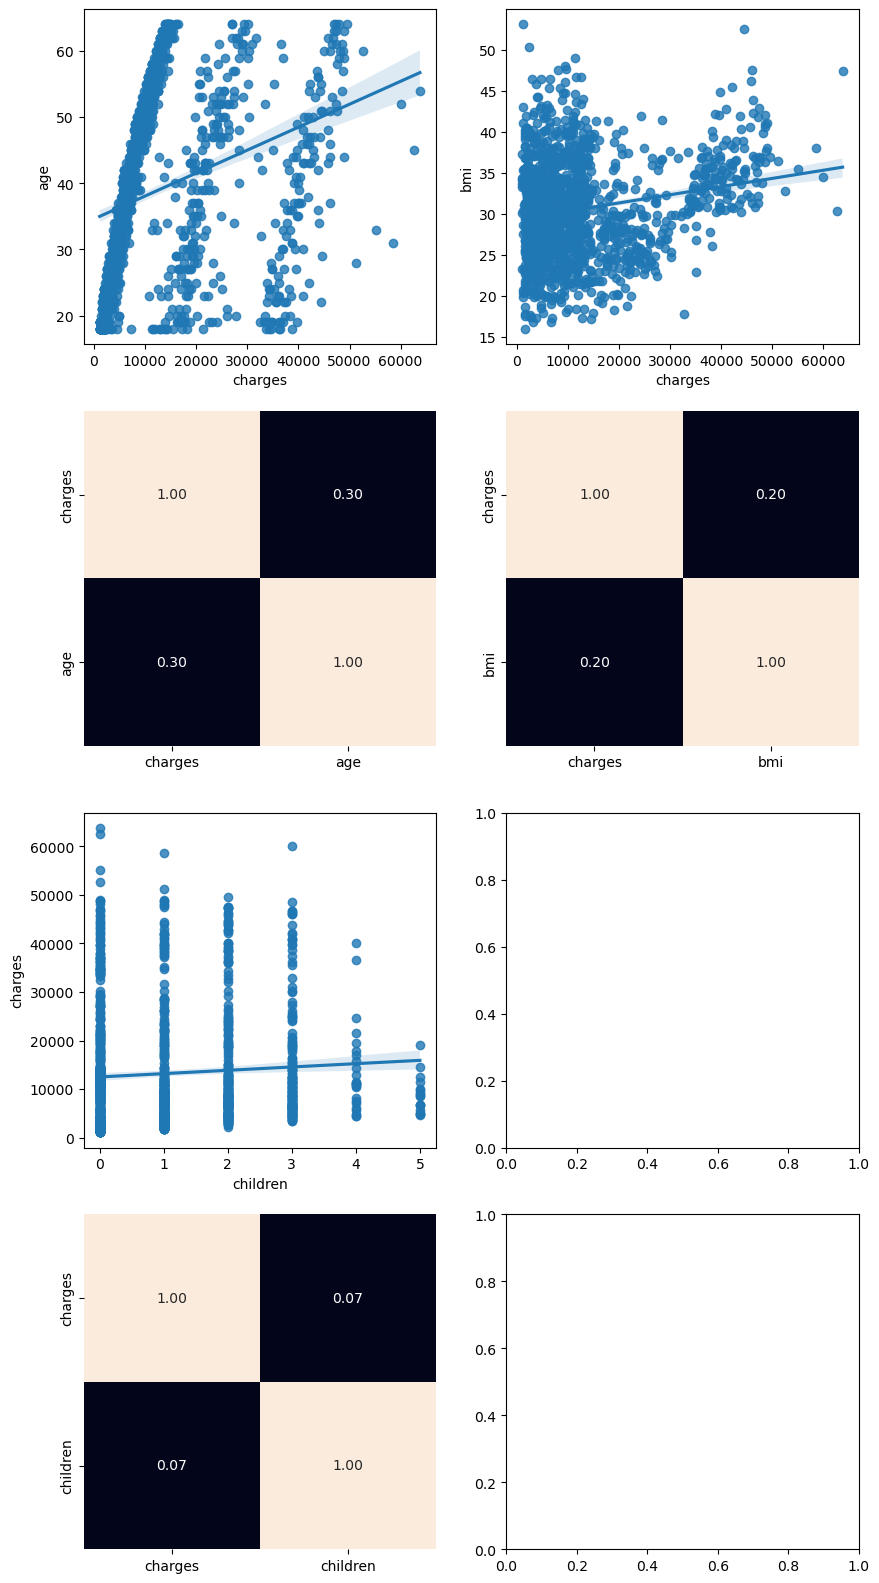

In [14]:
#analisis multivariante
#numerico-numerico

fig,axis= plt.subplots(4,2, figsize=(10,20))

sns.regplot(ax = axis[0, 0], data = df, x = "charges", y = "age")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax=axis[0,1],data=df,x="charges",y="bmi")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1 ], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

plt.show

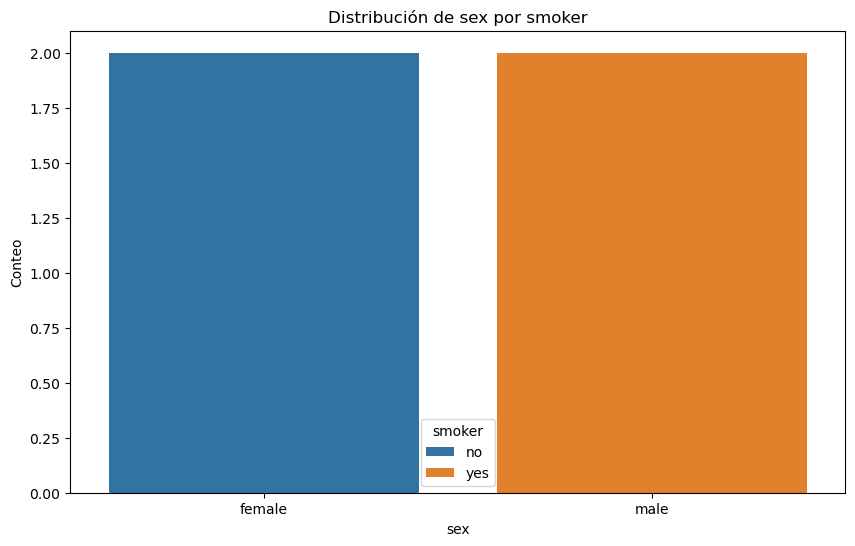

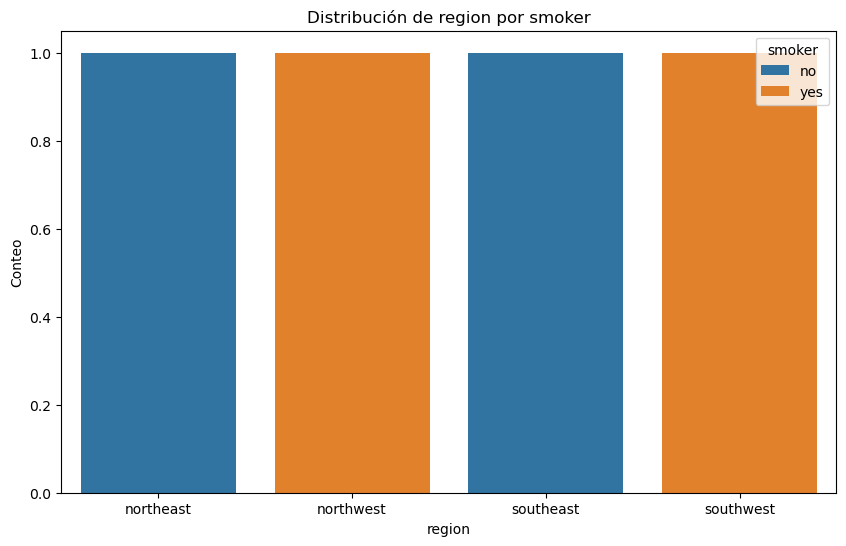

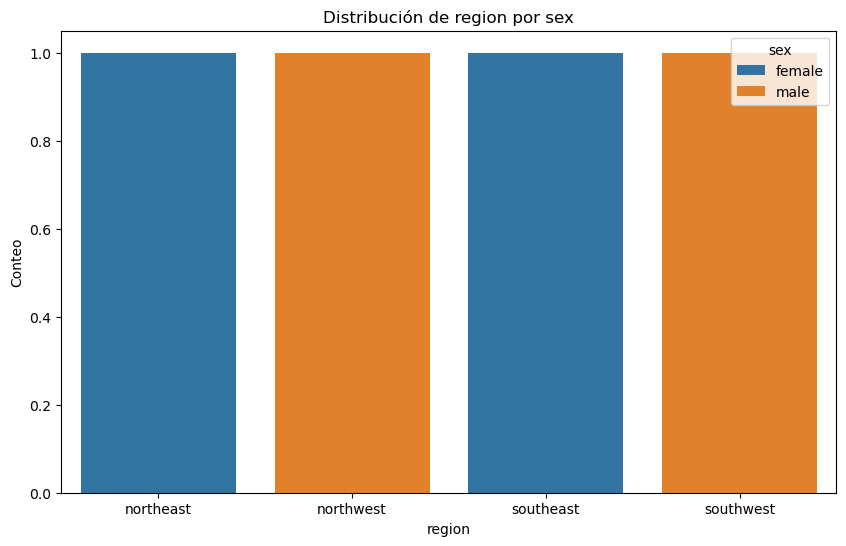

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def crear_graficos_categoricos(df2, variable_x, variable_hue):
    """
    Crea gráficos de barras agrupadas y apiladas para dos variables categóricas.

    Args:
        df2: DataFrame de Pandas.
        variable_x: Nombre de la variable en el eje x.
        variable_hue: Nombre de la variable para agrupar las barras.
    """
    # Gráfico de barras agrupadas
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable_x, hue=variable_hue, data=df2)
    plt.title(f'Distribución de {variable_x} por {variable_hue}')
    plt.xlabel(variable_x)
    plt.ylabel('Conteo')
    plt.legend(title=variable_hue)  # Añade una leyenda con título
    plt.show()

data = {
    'sex': ['female', 'male', 'female', 'male'],
    'smoker': ['no', 'yes', 'no', 'yes'],
    'region': ['northeast', 'northwest', 'southeast', 'southwest'],
}
df2 = pd.DataFrame(data)

crear_graficos_categoricos(df2, 'sex', 'smoker')
crear_graficos_categoricos(df2, 'region', 'smoker')
crear_graficos_categoricos(df2, 'region', 'sex')



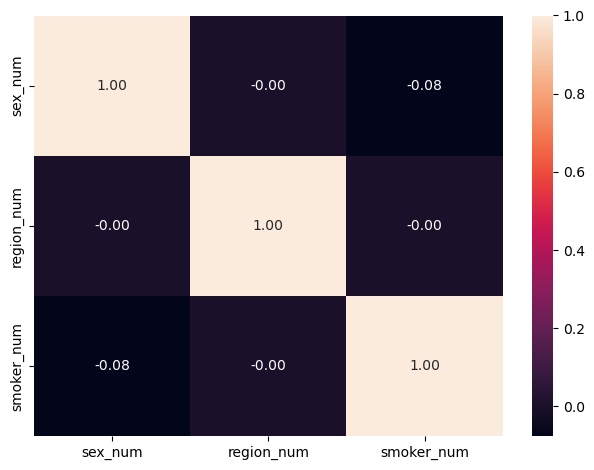

In [17]:

df['sex_num'] = pd.factorize(df['sex'])[0]
df['region_num'] = pd.factorize(df['region'])[0]
df['smoker_num'] = pd.factorize(df['smoker'])[0]

columnas_correlación = (['sex_num', 'region_num','smoker_num'])
sns.heatmap(df[columnas_correlación].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

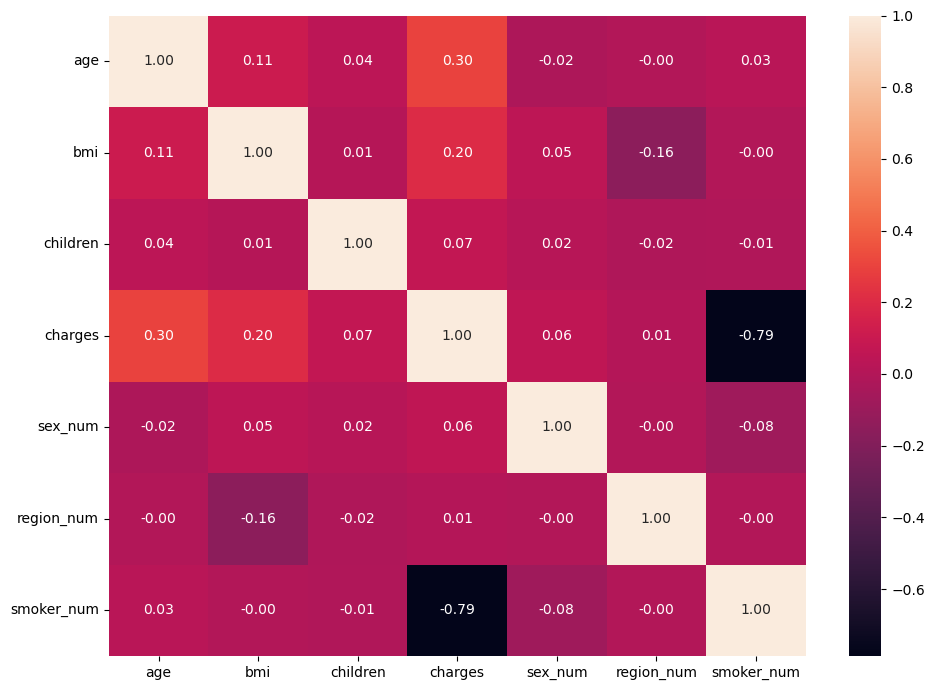

In [18]:
it, axis=plt.subplots(figsize=(10,7))

sns.heatmap(df._get_numeric_data().corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

In [19]:
df.groupby('charges')['smoker_num'].mean()

charges
1121.87390     1.0
1131.50660     1.0
1135.94070     1.0
1136.39940     1.0
1137.01100     1.0
              ... 
55135.40209    0.0
58571.07448    0.0
60021.39897    0.0
62592.87309    0.0
63770.42801    0.0
Name: smoker_num, Length: 1337, dtype: float64

In [20]:
df.charges.value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [21]:
#vamos a mejorar la precision del modelo. para eso buscaremos los outliers y ver su percentil

df.describe()

,age,bmi,children,charges,sex_num,region_num,smoker_num
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,1.484305,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,1.104885,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,2.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,3.000000,1.000000


In [ ]:
#Dibujar los diagramas de cajas de las variables también nos da una información muy poderosa sobre los valores atípicos
import numpy as np


nuevas_variables = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y", 'job_num', 'marital_num', 'education_num', 'default_num', 'housing_num', 'loan_num', 'contact_num', 'month_num', 'day_of_week_num', 'poutcome_num', 'y_num']

num_variables = len(nuevas_variables)
num_rows = (num_variables + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5)) 

for i, col in enumerate(nuevas_variables):
    row = i // 2  
    col_index = i % 2  
    sns.boxplot(ax=axes[row, col_index], data=df, y=col)

if num_variables % 2 != 0:
    axes[-1, 1].set_visible(False)

plt.tight_layout()
plt.show()
